In [18]:
import pandas as pd

# read the csv file
df = pd.read_csv('weight-height.csv')

# print the first 5 rows of the data set
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [19]:
# shape of the dataframe
df.shape

# data type of each column
df.dtypes

# number of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


In [20]:
# number of unique values of column Gender
df.Gender.nunique()
# 2

# unique values of column Gender
df.Gender.unique()
# array(['Male', 'Female'], dtype=object)

array(['Male', 'Female'], dtype=object)

In [35]:
import matplotlib.pyplot as plt
#plt.style.use('ggplot')


In [52]:
x = df[['Height']]
y = df['Weight']

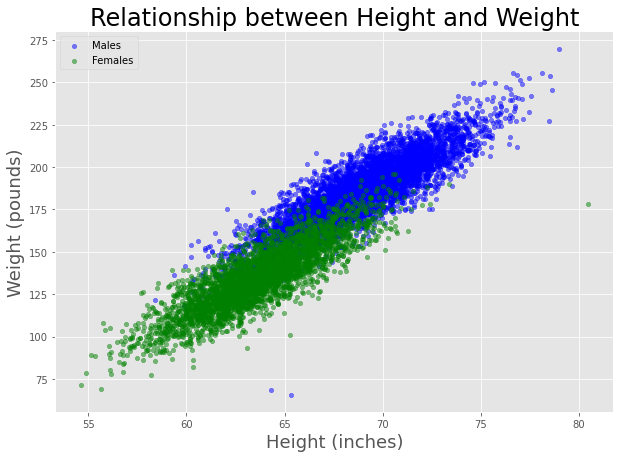

In [53]:
# Scatter plot of Height and Weight

ax1 = df[df['Gender'] == 'Male'].plot(kind='scatter', x='Height', y='Weight', color='blue', alpha=0.5, figsize=(10, 7))
df[df['Gender'] == 'Female'].plot(kind='scatter', x='Height', y='Weight', color='green', alpha=0.5, figsize=(10 ,7), ax=ax1)
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

In [54]:
#Linear Regression
#https://towardsdatascience.com/simple-and-multiple-linear-regression-with-python-c9ab422ec29c

In [55]:
from sklearn.model_selection import train_test_split
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [56]:
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [57]:
xtrain,xtest, ytrain,ytest = train_test_split(x,y,test_size=.30, train_size=70, random_state = 42)

In [58]:
xtrain.head()

,Height
553,67.594031
1397,71.601697
7934,62.625985
8367,66.136131
3320,71.843308


In [59]:
ytrain.head()

553     186.751417
1397    211.031652
7934    143.768451
8367    151.814648
3320    196.505814
Name: Weight, dtype: float64

In [60]:
xtest.shape

(2567, 1)

# Apply Linear Regression


In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
reg = LinearRegression()

In [63]:
#training linear regression model with train data
reg.fit(xtrain,ytrain)

LinearRegression()

In [64]:
m=reg.coef_
m

array([7.08345295])

In [65]:
c=reg.intercept_
c

-306.01073249490065

In [66]:
y = m * x + c

In [67]:
df['pred.Weight'] = reg.predict(df[['Height']])

In [68]:
df.head()

,Gender,Height,Weight,pred.Weight
0,Male,73.847017,241.893563,217.081138
1,Male,68.781904,162.310473,181.202649
2,Male,74.110105,212.740856,218.944712
3,Male,71.730978,220.042470,202.092278
4,Male,69.881796,206.349801,188.993681


In [69]:
df['pred.Height'] = reg.predict(df[['Weight']])

In [70]:
df.head()

,Gender,Height,Weight,pred.Weight,pred.Height
0,Male,73.847017,241.893563,217.081138,1407.430941
1,Male,68.781904,162.310473,181.202649,843.707863
2,Male,74.110105,212.740856,218.944712,1200.929109
3,Male,71.730978,220.042470,202.092278,1252.649753
4,Male,69.881796,206.349801,188.993681,1155.658371


In [73]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df.Gender = label.fit_transform(df['Gender'])

In [74]:
df.head()

,Gender,Height,Weight,pred.Weight,pred.Height
0,1,73.847017,241.893563,217.081138,1407.430941
1,1,68.781904,162.310473,181.202649,843.707863
2,1,74.110105,212.740856,218.944712,1200.929109
3,1,71.730978,220.042470,202.092278,1252.649753
4,1,69.881796,206.349801,188.993681,1155.658371


In [75]:
reg.score(xtest,ytest)

0.851301543356206

In [76]:
reg.predict(xtest)

array([153.32742061, 181.9426053 , 196.65495181, ..., 106.34266405,
       187.63365384, 154.39677841])

In [89]:
y_predict = reg.predict(xtest)
y_predict

array([153.32742061, 181.9426053 , 196.65495181, ..., 106.34266405,
       187.63365384, 154.39677841])

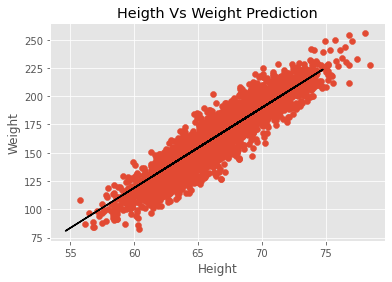

In [93]:
plt.scatter(xtest, ytest)
plt.plot( xtrain, reg.predict(xtrain), color='black')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Heigth Vs Weight Prediction")
plt.show()

In [94]:
from sklearn.metrics import r2_score

In [95]:
r2_score(ytest, y_predict)

0.851301543356206

In [85]:
from sklearn.neighbors import KNeighborsRegressor

In [86]:
neigh = KNeighborsRegressor(n_neighbors=2)

neigh.fit(X, y)

In [96]:
neigh.fit(xtrain, ytrain)

KNeighborsRegressor(n_neighbors=2)

In [97]:
y_predict_neigh = neigh.predict(xtest)

In [98]:
y_predict_neigh

array([148.05572645, 190.96784615, 196.47435105, ..., 138.8262581 ,
       182.7240477 , 148.2835826 ])

# Classification

In [99]:
df = pd.read_csv('weight-height.csv')

In [100]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [117]:
X_ml = df[['Height']]
y_ml = df['Gender']

In [118]:
X_ml.shape

(8555, 1)

In [119]:
y_ml = label.fit_transform(y_ml)

In [120]:
y_ml

array([1, 1, 1, ..., 0, 0, 0])

In [121]:
y_ml.shape

(8555,)

In [122]:
X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(X_ml, y_ml, test_size=0.3, random_state=31)

In [123]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [124]:
knn.fit(X_train_ml, y_train_ml)

KNeighborsClassifier(n_neighbors=3)

In [125]:
y_predict_ml = knn.predict(X_test_ml)

In [126]:
y_predict_ml

array([1, 1, 0, ..., 1, 0, 1])

In [127]:
from sklearn.metrics import confusion_matrix

In [128]:
confusion_matrix(y_test_ml, y_predict_ml)

array([[ 784,  234],
       [ 271, 1278]], dtype=int64)

In [129]:
knn = KNeighborsClassifier(n_neighbors=5) #n_neighbors is the number of neighbours
knn.fit(X_train_ml, y_train_ml)
y_predict_ml = knn.predict(X_test_ml)
cm = confusion_matrix(y_test_ml, y_predict_ml)
cm

array([[ 796,  222],
       [ 243, 1306]], dtype=int64)

In [131]:
#r2_score(X_test_ml, y_predict_ml)

In [133]:
knn.score(X_test_ml, y_test_ml)

0.818854694195559

In [134]:
from sklearn.model_selection import GridSearchCV

In [135]:
params = {
    "n_neighbors": [5, 10, 20],
    'leaf_size' : [30, 40, 50],
    'algorithm': ["ball_tree", "kd_tree", "brute"],
    'p': [1, 2]
}
gs = GridSearchCV(estimator=knn, cv=10, param_grid=params )

In [136]:
gsresult = gs.fit(X_train_ml, y_train_ml )

In [137]:
print(gsresult.best_score_) 
print(gsresult.best_params_)

0.8216447702692895
{'algorithm': 'ball_tree', 'leaf_size': 30, 'n_neighbors': 20, 'p': 1}


In [138]:
knn_best_fit = KNeighborsClassifier(algorithm = "ball_tree", leaf_size= 30, n_neighbors = 20, p=1)
knn_best_fit.fit(X_train_ml, y_train_ml)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=20, p=1)

In [139]:
y_predict_best = knn_best_fit.predict(X_test_ml)
cm_best = confusion_matrix(y_test_ml, y_predict_best)
cm_best

array([[ 833,  185],
       [ 242, 1307]], dtype=int64)

In [140]:
print("accuracy:", knn.score(X_test_ml, y_predict_best))

accuracy: 0.9111803661862096


<AxesSubplot:>

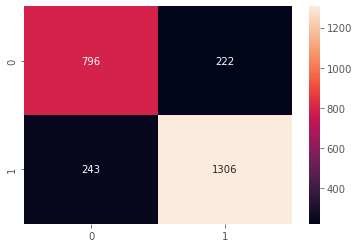

In [142]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='g')

<AxesSubplot:>

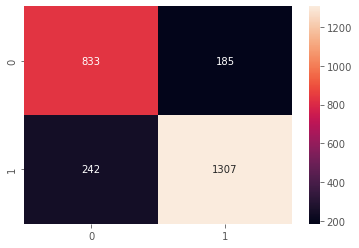

In [143]:
sns.heatmap(cm_best, annot=True, fmt='g')